# Stochastic Filtering in Aerial Navigation


This notebook displays examples of using stochastic filtering in problems of aerial navigation. Two filtering algorithms (Extended Kalman Filter and Particle Filter) are presented and compared.

## Problem Setting

The original description of the problem can be found in the article "Cubature Kalman Filtering for Continuous-Discrete
Systems: Theory and Simulations" by Ienkaran Arasaratnam et al., pages 4977-4993 (see this [link](https://www.researchgate.net/profile/Haran-Arasaratnam/publication/224153360_Cubature_Kalman_Filtering_for_Continuous-Discrete_Systems_Theory_and_Simulations/links/557cf84108aec87640db5057/Cubature-Kalman-Filtering-for-Continuous-Discrete-Systems-Theory-and-Simulations.pdf)). The further setting is taken directly from the aforementioned article.

We shall consider a typical air-traffic-control scenario
where the objective is to track the trajectory of an aircraft that
executes a maneuver at (nearly) constant speed and turn rate in
the horizontal plane. Specifically, the motion in the horizontal
plane and the motion in the vertical plane are considered to
be decoupled from each other. In the aviation language, this
kind of motion is commonly refereed to as (nearly) coordinated
turn. Hence, we may write the coordinated turn
in the three-dimensional space, subject to fairly “small” noise
modeled by independent Brownian motions as shown by

$$dx(t) = f(x(t))dt + \sqrt{Q}d\beta (t),$$

where the seven-dimensional state of the aircraft $x = [\xi, \dot{\xi}, \eta, \dot{\eta}, \zeta, \dot{\zeta}, \omega]^T$
with $\xi$, $\eta$ and $\zeta$ denoting positions and
$\dot{\xi}$, $\dot{\eta}$ and $\dot{\zeta}$ denoting velocities in the $x$, $y$ and $z$ Cartesian
coordinates, respectively; $\omega$ denotes the turn rate; the drift
function $f(x) = [\dot{\xi}, -\omega \dot{\eta}, \dot{\eta}, \omega \dot{\xi}, \dot{\zeta}, 0, 0]^T$; the noise term $\beta(t) = [\beta_1(t), \dots, \beta_7(t)]^T$
with $\beta_1(t), \dots, \beta_7(t)$
being all mutually independent standard Brownian motions,
accounts for unpredictable modeling errors due to turbulence, wind force, etc.; and finally the diffusion matrix
$Q = diag([0, \sigma_1^2, 0, \sigma_1^2, 0, \sigma_1^2, \sigma_2^2])$. For the experiment at
hand, the radar is located at the origin and equipped to measure
the range, $r$ , azimuth angle, $\theta$ , and elevation angle, $\phi$ , at measurement sampling time $T$. Hence, we write the measurement
equation

$$\begin{bmatrix}
           r_k \\
           \theta_k \\
           \phi_k
         \end{bmatrix} = 
  \begin{bmatrix}
           \sqrt{\xi_k^2 + \eta_k^2 + \zeta_k^2} \\
           \tan^{-1}\Big(\frac{\eta_k}{\xi_k}\Big) \\
           \tan^{-1}\Big(\frac{\zeta_k}{\sqrt{\xi_k^2 + \eta_k^2}}\Big)
         \end{bmatrix} + w_k,$$

where $w_k \sim \mathcal{N}(0, R)$ is the measurement noise with $R = diag([\sigma_r^2, \sigma_\theta^2, \sigma_\phi^2]).$

## Data Description and Dynamics Modelling

The following constant values are used: $\sigma_1 = \sqrt{0.2}; \: \sigma_2 = 7 \times 10^{-3}; \: \sigma_r = 50 \: m; \: \sigma_\theta = 0.1^\circ; \: \sigma_\phi = 0.1^\circ;$ initial state is $x_0 = [1000 \: m, 0 \: {ms}^{-1}, 2650 \: m, 150 \: {ms}^{-1}, 200 \: m, 0 \: {ms}^{-1}, 3^\circ/s].$

The dynamic system condition is being modelled with Euler–Maruyama method over the course of 60 seconds with step $h = 0.001 \: s$. Measurement sampling time is $T = 1 \: s$. Discretized version of function $f$ is denoted by $f_d$; observation-generating function is denoted by $A$.

## Extended Kalman Filter

The following algorithm implements the Extended Kalman Filter. In the formulas below, $X$ symbols denote the system state; $k$ symbols denote the covariance matrix of the system state; $Y$ denotes the observations.

1. **Initial state**
$$\hat{X}_0 = \hat{X}_1 = x_0,$$
$$k_0 = k_1 = I_{n\times n},$$
where $I_{n\times n}$ is an $n \times n$ identity matrix.


2. **Prediction**
$$\tilde{X}_t = \frac{\partial f}{\partial x}(\hat{X}_{t-2}) \: \hat{X}_{t-1} + \Big( f(\hat{X}_{t-2}) - \frac{\partial f}{\partial x} (\hat{X}_{t-2}) \: \hat{X}_{t-2}\Big),$$
$$\tilde{k}_t = \frac{\partial f}{\partial x}(\hat{X}_{t-2}) \: k_{t-1} \: \Big( \frac{\partial f}{\partial x}(\hat{X}_{t-2})  \Big)^T + hQ.$$


3. **Update**
$$\hat{X}_{t} = \tilde{X}_t + \tilde{k}_t \: \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \Big)^T \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \: \tilde{k}_t \: \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \Big)^T +  R\Big)^{-1} \times$$
$$\times \Big( Y_t - \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \: \tilde{X}_t - \Big( A(\hat{X}_{t-1}) - \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \: \hat{X}_{t-1} \Big) \Big),$$
$$k_t = \tilde{k}_t - \tilde{k}_t \: \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \Big)^T \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \: \tilde{k}_t \Big( \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \Big)^T + R \Big) \: \frac{\partial A}{\partial x} (\hat{X}_{t-1}) \: \tilde{k}_t.$$

## Optimal Particle Filter

The following algorithm implements the Optimal Particle Filter. In the formulas below, $X$ symbols denote the system state; $k$ symbols denote the covariance matrix of the system state; $Y$ denotes the observations. $N$ is the number of particles (in calculations, a total of $N = 300$ particles is used).

1. **Initial state**

   *Particles*: $\{X_0^{(i)}\}_{i=1}^N, \; X_0^{(i)} = x_0 \: \forall i.$
   
   *Weights*: $\{w_0^{(i)}\}_{i=1}^N, \; w_0^{(i)} = \frac{1}{N} \: \forall i.$
   
   *Filtration estimate*: $\hat{X}_0 = \sum_{i=1}^{N}w_0^{(i)}X_0^{(i)}.$


2. **Prediction**

    *Particles*: $\tilde{X}_t^{(i)} = f(X_{t-1}^{(i)}) + \xi_i \quad \forall i = \overline{1,n}$, where $\xi_i \sim \mathcal{N}(0, \delta Q).$
   
    *Weights*: $\tilde{w}_t^{(i)} = w_{t-1}^{(i)} \: \forall i.$
    
    
3. **Update**

    *Particles*: $X_t^{(i)} = \tilde{X}_t^{(i)} \: \forall i.$
    
    *Weights*: $$w_t^{(i)} = \frac{p(Y_t | X_t^{(i)})}{\sum_{j=1}^{N}p(Y_t | X_t^{(j)})} \quad \forall i,$$ where $p(\bullet | \bullet)$ is the likelihood function.
    
4. **Significance resampling**

    If $n_{err} = \frac{1}{\sum_{j=1}^N(w_t^{(j)})^2} < N/10$, then resample:
    $$X_t^{(i)} = \mathcal{X}_t^{(i)} \quad \forall i, \: \text{where} \: \mathcal{X}_t^{(i)} \sim \{ (X_t^{(i)}, w_t^{(i)}) \}_{i=1}^N,$$
    $$w_t^{(i)} = \frac{1}{N} \quad \forall i.$$
    
    
5. **Filtration estimate**

    $\hat{X}_t = \sum_{i=1}^{N}w_t^{(i)}X_t^{(i)}$.

# Source code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
import copy
import warnings

In [4]:
# ==================
#  Model parameters
# ==================

# Initial state
omega = 3 * (np.pi/180)
x_0 = np.array([1000, 0, 2650, 150, 200, 0, omega]).reshape((-1,1))

# Noise variances
sigma_1 = np.sqrt(0.2)
sigma_2 = 0.007
sigma_r = 50
sigma_theta = 0.1 * (np.pi/180)
sigma_phi = 0.1 * (np.pi/180)
Q = np.diagflat([0, sigma_1 ** 2, 0, sigma_1 ** 2, 0, sigma_1 ** 2, sigma_2 ** 2])
sqrt_Q = np.diagflat([0, sigma_1, 0, sigma_1, 0, sigma_1, sigma_2])
R = np.diagflat([sigma_r ** 2, sigma_theta ** 2, sigma_phi ** 2])

# Discretization parameters
m = 60000
delta = 0.001
delta_obs = 1.0

In [3]:
# =========================
#  Miscellaneous functions
# =========================

# Discretized drift function
def f_d(x, delta=delta):
    out = np.array([0.0,] * 7)
    
    out[0] = x[0] + (delta * x[1]) - (((delta ** 2) / 2) * x[6] * x[3])
    out[1] = x[1] - (delta * x[6] * x[3]) - (((delta ** 2) / 2) * (x[6] ** 2) * x[1])
    out[2] = x[2] + (delta * x[3]) + (((delta ** 2) / 2) * x[6] * x[1])
    out[3] = x[3] + (delta * x[6] * x[1]) - (((delta ** 2) / 2) * (x[6] ** 2) * x[3])
    out[4] = x[4] + (delta * x[5])
    out[5] = x[5]
    out[6] = x[6]
    
    return out.reshape((-1,1))

# Derivatives matrix for the drift function
def f_d_der(x, delta=delta):
    out = np.eye(7)
    
    ksi = x[0]
    ksi_dot = x[1]
    eta = x[2]
    eta_dot = x[3]
    zeta = x[4]
    zeta_dot = x[5]
    omega = x[6]
    
    out[0, 1] = delta
    out[0, 3] = - ((delta ** 2) / 2) * omega
    out[0, 6] = - ((delta ** 2) / 2) * eta_dot
    out[1, 1] = 1 - (((delta * omega) ** 2) / 2)
    out[1, 3] = - delta * omega
    out[1, 6] = - (delta * eta_dot) - ((delta ** 2) * omega * ksi_dot)
    out[2, 1] = ((delta ** 2) / 2) * omega
    out[2, 3] = delta
    out[2, 6] = ((delta ** 2) / 2) * ksi_dot
    out[3, 1] = delta * omega
    out[3, 3] = 1 - (((delta * omega) ** 2) / 2)
    out[3, 6] = (delta * ksi_dot) - ((delta ** 2) * omega * eta_dot)
    out[4, 5] = delta
    
    return out

# Observation-generating function
def A(x):
    out = []
    
    ksi = x[0]
    ksi_dot = x[1]
    eta = x[2]
    eta_dot = x[3]
    zeta = x[4]
    zeta_dot = x[5]
    omega = x[6]
    
    out.append(np.sqrt(ksi ** 2 + eta ** 2 + zeta ** 2))
    out.append(np.arctan(eta/ksi))
    out.append(np.arctan(zeta/np.sqrt(ksi ** 2 + eta ** 2)))
    
    return np.array(out).reshape((-1,1))

# Derivatives matrix for the observation-generating function
def A_der(x):
    out = np.zeros((3, 7))
    
    ksi = x[0]
    ksi_dot = x[1]
    eta = x[2]
    eta_dot = x[3]
    zeta = x[4]
    zeta_dot = x[5]
    omega = x[6]
    
    r = np.sqrt(ksi ** 2 + eta ** 2 + zeta ** 2)
    
    out[0, 0] = ksi / r
    out[0, 2] = eta / r
    out[0, 4] = zeta / r
    out[1, 0] = - eta / (ksi ** 2 + eta ** 2)
    out[1, 2] = ksi / (ksi ** 2 + eta ** 2)
    out[2, 0] = - (ksi * zeta) / ((r ** 2) * np.sqrt(ksi ** 2 + eta ** 2))
    out[2, 2] = - (eta * zeta) / ((r ** 2) * np.sqrt(ksi ** 2 + eta ** 2))
    out[2, 4] = np.sqrt(ksi ** 2 + eta ** 2) / (r ** 2)
    
    return out

In [4]:
# ===================================
#  State and observations generation
# ===================================

# State
def generate_X(total=m, delta=delta):
    out = x_0
    
    for i in range(m):
        u_1 = np.random.multivariate_normal([0.0,] * 7, np.eye(7)).reshape((-1,1))
        w = np.sqrt(delta) * u_1
        x_new = f_d(out[:,-1]) + sqrt_Q @ w
        out = np.hstack((out, x_new))
    
    return out

# Observations
def generate_Y(X, delta=delta, delta_obs=delta_obs):
    out = np.array([0,0,0]).reshape((-1,1))
    for i in range(1, m):
        if np.isclose(delta * (i-1), round(delta * (i-1))):
            x_cur = X[:,i]
            r = np.sqrt(x_cur[0] ** 2 + x_cur[2] ** 2 + x_cur[4] ** 2) + np.random.normal(0, sigma_r)
            theta = np.arctan(x_cur[2]/x_cur[0]) + np.random.normal(0, sigma_theta)
            phi = np.arctan(x_cur[4]/np.sqrt(x_cur[0] ** 2 + x_cur[2] ** 2)) + np.random.normal(0, sigma_phi)
            y_new = np.array([r, theta, phi]).reshape((-1,1))
            out = np.hstack((out, y_new))
    return out[:,1:]
        

In [42]:
# ===============
#  Visualization
# ===============

# Condition graphs (total of 7 graphs)
def plot_conditions(X):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
    
    axes[0][0].set_title("ksi")
    axes[0][0].plot(X[0,:], color='red')  
    axes[0][0].grid()

    axes[0][1].set_title("eta")
    axes[0][1].plot(X[2,:], color='red')  
    axes[0][1].grid()

    axes[0][2].set_title("zeta")
    axes[0][2].plot(X[4,:], color='red')  
    axes[0][2].grid()

    axes[1][0].set_title("ksi speed")
    axes[1][0].plot(X[1,:], color='red')  
    axes[1][0].grid()

    axes[1][1].set_title("eta speed")
    axes[1][1].plot(X[3,:], color='red')  
    axes[1][1].grid()

    axes[1][2].set_title("zeta speed")
    axes[1][2].plot(X[5,:], color='red')  
    axes[1][2].grid()

    fig, ax_w = plt.subplots(figsize=(4.5,4))
    ax_w.set_title("omega")
    ax_w.plot(X[6,:], color='red')  
    ax_w.grid()

    plt.show()
    

# Observation graphs (total of 3 graphs)
def plot_observations(Y):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    axes[0].set_title("r")
    axes[0].plot(Y[0,:], color='red')  
    axes[0].grid()
    
    axes[1].set_title("theta")
    axes[1].plot(Y[1,:], color='red')  
    axes[1].grid()
    
    axes[2].set_title("phi")
    axes[2].plot(Y[2,:], color='red')  
    axes[2].grid()
    
    plt.show()

# Flight trajectory in 3D-space
def plot_3d_trajectory(X):
    fig = plt.figure(figsize=(15,9))

    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[0,0],X[2,0],X[4,0], c='black')
    ax.plot(X[0,:],X[2,:],X[4,:])
    ax.set_xlabel(r'$\xi$' + ', m')
    ax.set_ylabel(r'$\eta$' + ', m')
    ax.set_zlabel(r'$\zeta$' + ', m')
    ax.set_zlim(0, 500)

    plt.show()

# Condition graphs w/ estimates (total of 7 graphs)
def plot_with_estimate(X, X_est):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
    
    axes[0][0].set_title("ksi")
    axes[0][0].plot(X[0,:], color='red')  
    axes[0][0].plot(X_est[0,:], color='blue')  
    axes[0][0].grid()

    axes[0][1].set_title("eta")
    axes[0][1].plot(X[2,:], color='red')
    axes[0][1].plot(X_est[2,:], color='blue')
    axes[0][1].grid()

    axes[0][2].set_title("zeta")
    axes[0][2].plot(X[4,:], color='red') 
    axes[0][2].plot(X_est[4,:], color='blue') 
    axes[0][2].grid()

    axes[1][0].set_title("ksi speed")
    axes[1][0].plot(X[1,:], color='red')  
    axes[1][0].plot(X_est[1,:], color='blue') 
    axes[1][0].grid()

    axes[1][1].set_title("eta speed")
    axes[1][1].plot(X[3,:], color='red')
    axes[1][1].plot(X_est[3,:], color='blue')
    axes[1][1].grid()

    axes[1][2].set_title("zeta speed")
    axes[1][2].plot(X[5,:], color='red') 
    axes[1][2].plot(X_est[5,:], color='blue')
    axes[1][2].grid()

    fig, ax_w = plt.subplots(figsize=(4.5,4))
    ax_w.set_title("omega")
    ax_w.plot(X[6,:], color='red')
    ax_w.plot(X_est[6,:], color='blue')
    ax_w.grid()

    plt.show()

# Graphs for standart deviations of estimates
def plot_with_estimate_report(X, X_est_ekf, X_est_pf):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    axes[0][0].set_xlabel('time, ms')
    axes[0][0].set_ylabel('sd (' + r'$\xi$' + '), m')
    axes[0][0].plot(X[0,:], color='red', label='true')
    axes[0][0].plot(X_est_ekf[0,:], color='blue', label='EKF error')
    axes[0][0].plot(X_est_pf[0,:], color='green', label='PF error') 
    axes[0][0].legend()
    axes[0][0].grid()
    
    axes[0][1].set_xlabel('time, ms')
    axes[0][1].set_ylabel('sd (' + r'$\dot{\xi}$' + '), m/s')
    axes[0][1].plot(X[1,:], color='red', label='true') 
    axes[0][1].plot(X_est_ekf[1,:], color='blue', label='EKF error')
    axes[0][1].plot(X_est_pf[1,:], color='green', label='PF error') 
    axes[0][1].legend()
    axes[0][1].grid()

    axes[1][0].set_xlabel('time, ms')
    axes[1][0].set_ylabel('sd (' + r'$\eta$' + '), m')
    axes[1][0].plot(X[2,:], color='red', label='true')
    axes[1][0].plot(X_est_ekf[2,:], color='blue', label='EKF error')
    axes[1][0].plot(X_est_pf[2,:], color='green', label='PF error') 
    axes[1][0].legend()
    axes[1][0].grid()

    axes[1][1].set_xlabel('time, ms')
    axes[1][1].set_ylabel('sd (' + r'$\dot{\eta}$' + '), m/s')
    axes[1][1].plot(X[3,:], color='red', label='true')
    axes[1][1].plot(X_est_ekf[3,:], color='blue', label='EKF error')
    axes[1][1].plot(X_est_pf[3,:], color='green', label='PF error')  
    axes[1][1].legend()
    axes[1][1].grid()

    axes[2][0].set_xlabel('time, ms')
    axes[2][0].set_ylabel('sd (' + r'$\zeta$' + '), m')
    axes[2][0].plot(X[4,:], color='red', label='true')
    axes[2][0].plot(X_est_ekf[4,:], color='blue', label='EKF error')
    axes[2][0].plot(X_est_pf[4,:], color='green', label='PF error')  
    axes[2][0].legend()
    axes[2][0].grid()

    axes[2][1].set_xlabel('time, ms')
    axes[2][1].set_ylabel('sd (' + r'$\dot{\zeta}$' + '), m/s')
    axes[2][1].plot(X[5,:], color='red', label='true')
    axes[2][1].plot(X_est_ekf[5,:], color='blue', label='EKF error')
    axes[2][1].plot(X_est_pf[5,:], color='green', label='PF error') 
    axes[2][1].legend()
    axes[2][1].grid()

    fig, ax_w = plt.subplots(figsize=(7,4.5))
    
    ax_w.set_xlabel('time, ms')
    ax_w.set_ylabel('sd (' + r'$\omega$' + '), rad/s')
    ax_w.plot(X[6,:], color='red', label='true')  
    ax_w.plot(X_est_ekf[6,:], color='blue', label='EKF error')
    ax_w.plot(X_est_pf[6,:], color='green', label='PF error') 
    ax_w.legend()
    ax_w.grid()

    plt.show()

In [44]:
# =======================
#  Filtrating algorithms
# =======================

# Extended Kalman Filter
def ekf(Y):
    # Initial state
    X_est = x_0
    k_est = np.zeros((7,7))
    X_out = copy.deepcopy(X_est)
    k_out = np.diag(k_est).reshape((-1,1))
    X_est_prev = x_0
    
    for i in range(1, m + 1):
        # Prediction
        da = f_d_der(X_est_prev)
        X_pred = da @ X_est + f_d(X_est_prev) - da @ X_est_prev
        k_pred = da @ k_est @ da.T + delta * Q
        # Update
        if (i - 1) % 1000 == 0:
            X_est_prev = copy.deepcopy(X_est)
            dA = A_der(X_est)
            X_est = X_pred + k_pred @ dA.T @ np.linalg.pinv(dA @ k_pred @ dA.T + R) @ \
                    (Y[:, (i - 1) // 1000].reshape((-1,1)) - dA @ X_pred - (A(X_est) - dA @ X_est))
            k_est = k_pred - k_pred @ dA.T @ np.linalg.pinv(dA @ k_pred @ dA.T + R) @ dA @ k_pred
        else:
            X_est_prev = copy.deepcopy(X_est)
            X_est = copy.deepcopy(X_pred)
            k_est = copy.deepcopy(k_pred)
        
        X_out = np.hstack((X_out, X_est))
        k_out = np.hstack((k_out, np.diag(k_est).reshape((-1,1))))
    
    return X_out, k_out

# Optimal Particle Filter
def opt_pf(Y, N=300):
    rv_r = stats.norm(0, sigma_r)
    rv_theta = stats.norm(0, sigma_theta)
    rv_phi = stats.norm(0, sigma_phi)

    # Initial state
    particles = np.asarray([x_0[:,0],] * N).reshape((-1,7))
    weights = np.asarray([1/N,] * N).reshape((-1,1))
    X_est = x_0
    X_out = copy.deepcopy(X_est)
    
    for i in range(1, m + 1):
        # Prediction
        particles = np.apply_along_axis(f_d, 1, particles).reshape((-1,7))
        w_matr = np.sqrt(delta) * np.random.normal(size=(N,7)) @ sqrt_Q.T
        particles = particles + w_matr

        # Update
        if (i - 1) % 1000 == 0:
            r_obs = Y[0, (i - 1) // 1000]
            theta_obs = Y[1, (i - 1) // 1000]
            phi_obs = Y[2, (i - 1) // 1000]
            for j in range(N):
                particle = particles[j,:]
                r_part = np.sqrt(particle[0] ** 2 + particle[2] ** 2 + particle[4] ** 2)
                theta_part = np.arctan(particle[2]/particle[0])
                phi_part = np.arctan(particle[4]/np.sqrt(particle[0] ** 2 + particle[2] ** 2))
                weights[j, 0] = rv_r.pdf(r_part - r_obs) * rv_theta.pdf(theta_part - theta_obs) * rv_phi.pdf(phi_part - phi_obs)
            weights[:, 0] = weights[:, 0] / np.sum(weights[:, 0])

            # Significance resampling
            n_err = 1 / (np.sum(weights ** 2))
            if n_err < (N / 10):
                particles = particles[np.random.choice(range(N), N, p=weights.ravel()),:]
                weights = np.asarray([1/N,] * N).reshape((-1,1))
    
        X_est = particles.T @ weights
        X_out = np.hstack((X_out, X_est))

    return X_out

# 1. Generation of state functions and observations

In [7]:
np.random.seed(5)

X = generate_X()
Y = generate_Y(X)

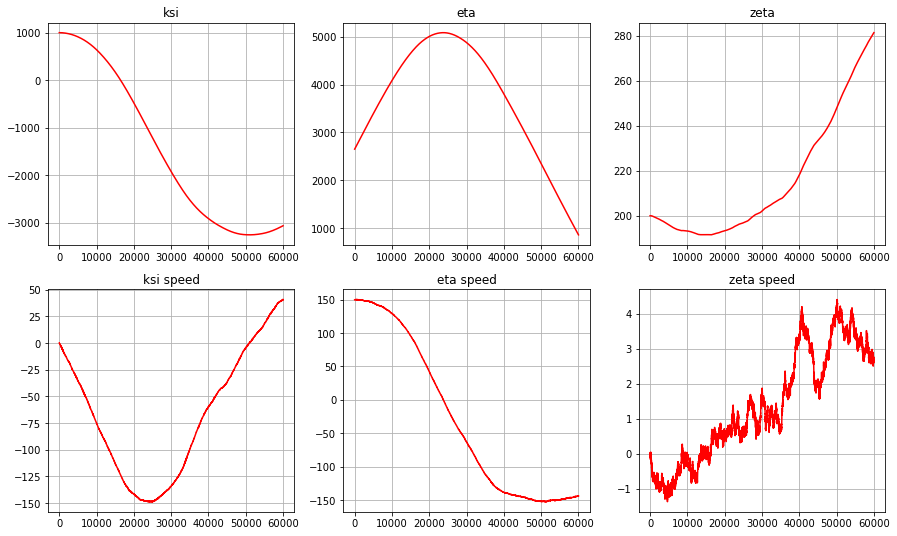

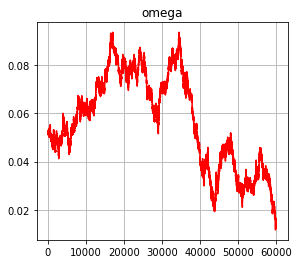

In [8]:
plot_conditions(X)

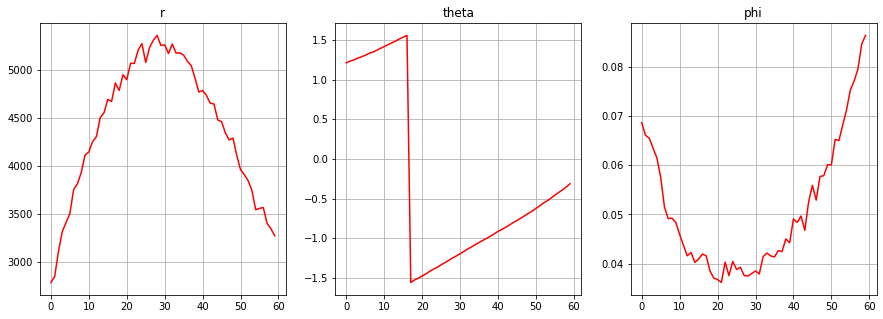

In [126]:
plot_observations(Y)

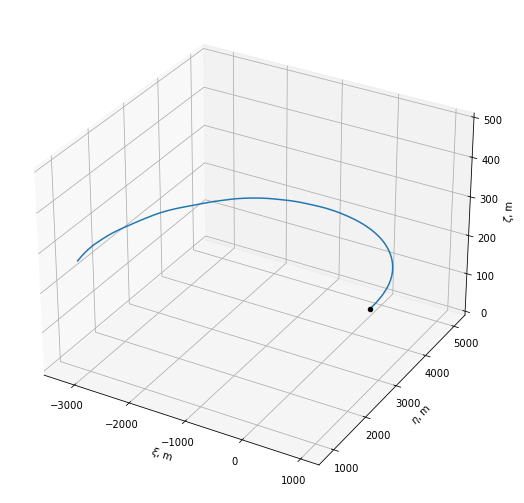

In [263]:
plot_3d_trajectory(X)

# 2. EKF

In [27]:
X_est_ekf, k_est_ekf = ekf(Y)

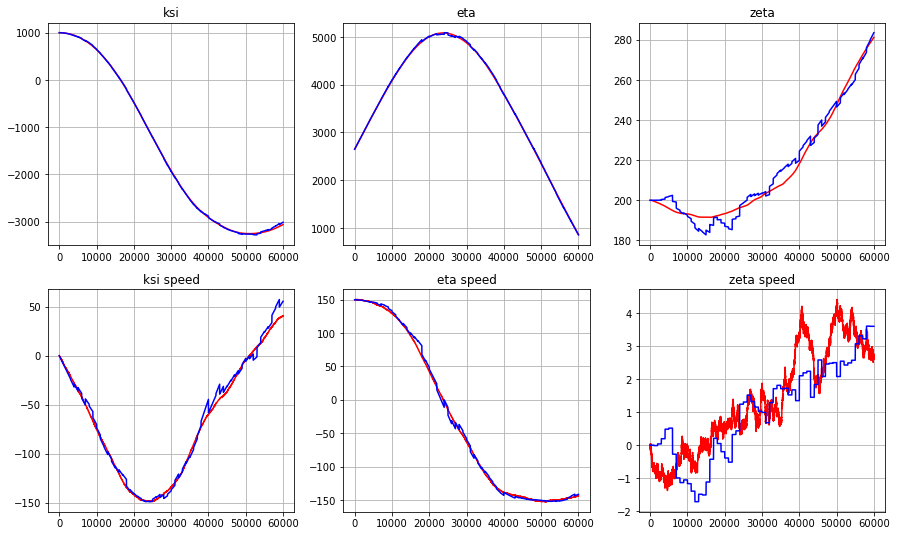

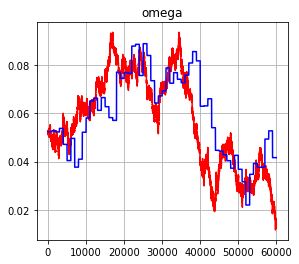

In [29]:
plot_with_estimate(X, X_est_ekf)

# 3. PF

In [31]:
pf_test = opt_pf(Y, 500)

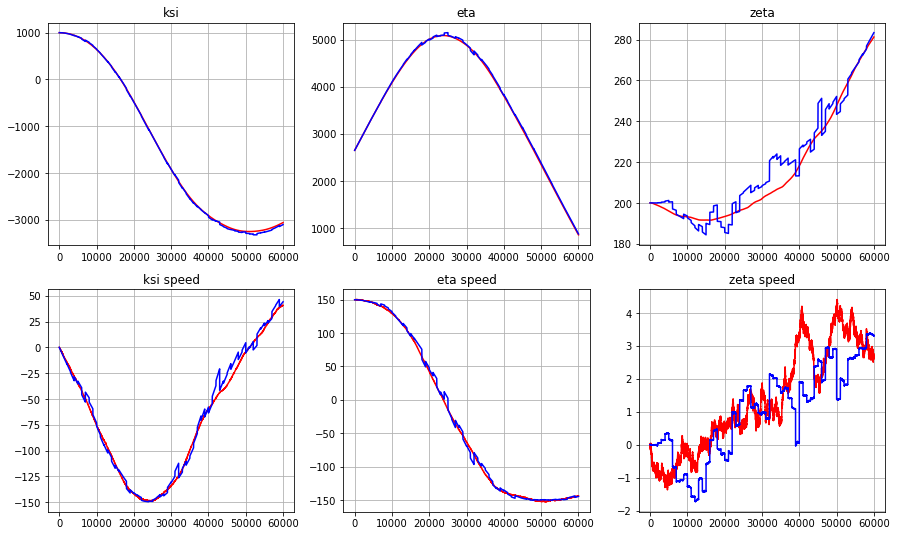

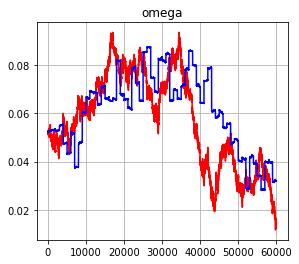

In [32]:
plot_with_estimate(X, pf_test)

# 4. Standard Deviations

In [5]:
# =================
#  STD Calculation
# =================

# STD of state functions
def condition_mean_std(K=10000):
    all_cond = np.array([x_0,] * K).reshape((-1,7))
    std = np.array([0.0,] * 7).reshape((-1,1))

    for i in range(m):
        all_cond = np.apply_along_axis(f_d, 1, all_cond).reshape((-1,7))
        all_cond = all_cond + np.sqrt(delta) * (np.random.normal(size=K*7).reshape((-1,7)) @ sqrt_Q)
        std = np.hstack((std, np.apply_along_axis(np.std, 0, all_cond).reshape((-1,1))))
        if i % 1000 == 0:
            print(i)
    return std

# STD of EKF error
def ekf_lazy(K=100):
    ekf_mean = np.zeros((7, m + 1))
    ekf_var = np.zeros((7, m + 1))
    count = 0
    for i in range(K):
        np.random.seed(i)
        X = generate_X()
        Y = generate_Y(X)
        ekf_x, _ = ekf(Y)
        ekf_err = ekf_x - X
        if np.max(ekf_err) > 1000:
            continue
        ekf_var = (count / (count + 1)) * (ekf_var + (ekf_mean ** 2)) + (1 / (count+1)) * (ekf_err ** 2)
        ekf_mean = (count / (count + 1)) * ekf_mean + (1 / (count+1)) * ekf_err
        ekf_var = ekf_var - (ekf_mean ** 2)
        print(count + 1)
        count += 1
    return ekf_var

# STD of PF error
def pf_lazy(K=100):
    pf_mean = np.zeros((7, m + 1))
    pf_var = np.zeros((7, m + 1))
    count = 0
    while count < K:
        #np.random.seed(i)
        X = generate_X()
        Y = generate_Y(X)
        with warnings.catch_warnings():
            warnings.filterwarnings("error")
            try:
                pf_x = opt_pf(Y, 100)
            except RuntimeWarning:
                print("ERROR 1")
                continue
        pf_err = pf_x - X
        if np.max(pf_err) > 1000:
            print("ERROR 2")
            continue
        pf_var = (count / (count + 1)) * (pf_var + (pf_mean ** 2)) + (1 / (count+1)) * (pf_err ** 2)
        pf_mean = (count / (count + 1)) * pf_mean + (1 / (count+1)) * pf_err
        pf_var = pf_var - (pf_mean ** 2)
        print(count + 1)
        count += 1
    return pf_var

In [ ]:
cstd = condition_mean_std(100)

In [ ]:
ekf_errs = ekf_lazy(100)

In [ ]:
pf_errs = pf_lazy(100)

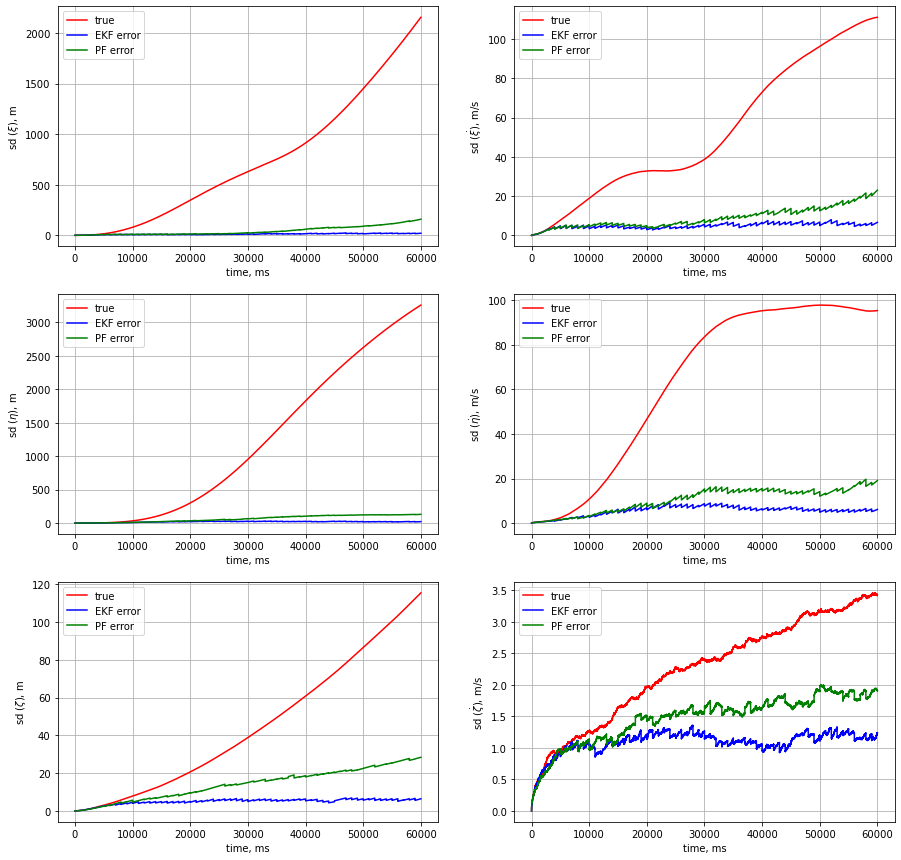

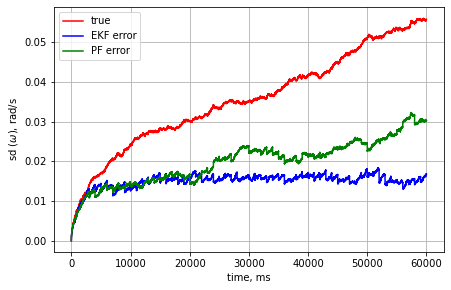

In [43]:
plot_with_estimate_report(cstd, np.sqrt(ekf_errs), np.sqrt(pf_errs))